In [2]:
import sklearn.metrics as metrics
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def mean_absolute_percentage_error(y_test,y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    errors = abs(y_test - y_pred)
    mape = 100 * np.mean(errors / y_test)
    print('mape---{}'.format(mape))
    mape1= np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    return mape


In [5]:
def calculate_metrics(y, ypred):
    MAE = metrics.mean_absolute_error(y, ypred)
    RMSE = metrics.mean_squared_error(y, ypred,squared=False)
    mse=metrics.mean_squared_error(y,ypred)
    r2=metrics.r2_score(y,ypred)

    return MAE,RMSE,mse,r2

In [6]:
#price_usd_df=pd.read_excel("/content/drive/MyDrive/Dissertation/My Dissertation/Data/After preprocessing/Bitcoin price and forex in USD_next day_after smoothing.xlsx")
price_usd_df=pd.read_excel("/content/drive/MyDrive/Dissertation/My Dissertation/Data/Pre-processed results/Removed missing values.xlsx")

print(price_usd_df.dtypes)
price_usd_df.head(21)

Date      datetime64[ns]
XBTUSD           float64
AUDUSD           float64
CADUSD           float64
CNYUSD           float64
EURUSD           float64
GBPUSD           float64
JPYUSD           float64
NZDUSD           float64
SGDUSD           float64
dtype: object


,Date,XBTUSD,AUDUSD,CADUSD,CNYUSD,EURUSD,GBPUSD,JPYUSD,NZDUSD,SGDUSD
0,2017-01-03,1024.38,0.7219,0.7448,0.14385,1.0405,1.2237,0.008493,0.6918,0.6895
1,2017-01-04,1091.66,0.7283,0.7519,0.14504,1.0489,1.2323,0.008529,0.6970,0.6948
2,2017-01-05,971.26,0.7338,0.7562,0.14547,1.0607,1.2419,0.008669,0.7026,0.7001
3,2017-01-06,898.16,0.7301,0.7555,0.14424,1.0532,1.2287,0.008547,0.6960,0.6950
4,2017-01-08,917.41,0.7301,0.7555,0.14424,1.0532,1.2287,0.008547,0.6960,0.6950
5,2017-01-09,897.51,0.7354,0.7567,0.14416,1.0574,1.2163,0.008617,0.7016,0.6962
6,2017-01-10,909.81,0.7368,0.7557,0.14435,1.0554,1.2177,0.008637,0.6990,0.6963
7,2017-01-11,789.11,0.7441,0.7589,0.14471,1.0582,1.2213,0.008665,0.7055,0.7008
8,2017-01-12,827.63,0.7484,0.7608,0.14515,1.0613,1.2162,0.008717,0.7095,0.7006
9,2017-01-13,830.70,0.7502,0.7625,0.14506,1.0643,1.2182,0.008733,0.7131,0.6998


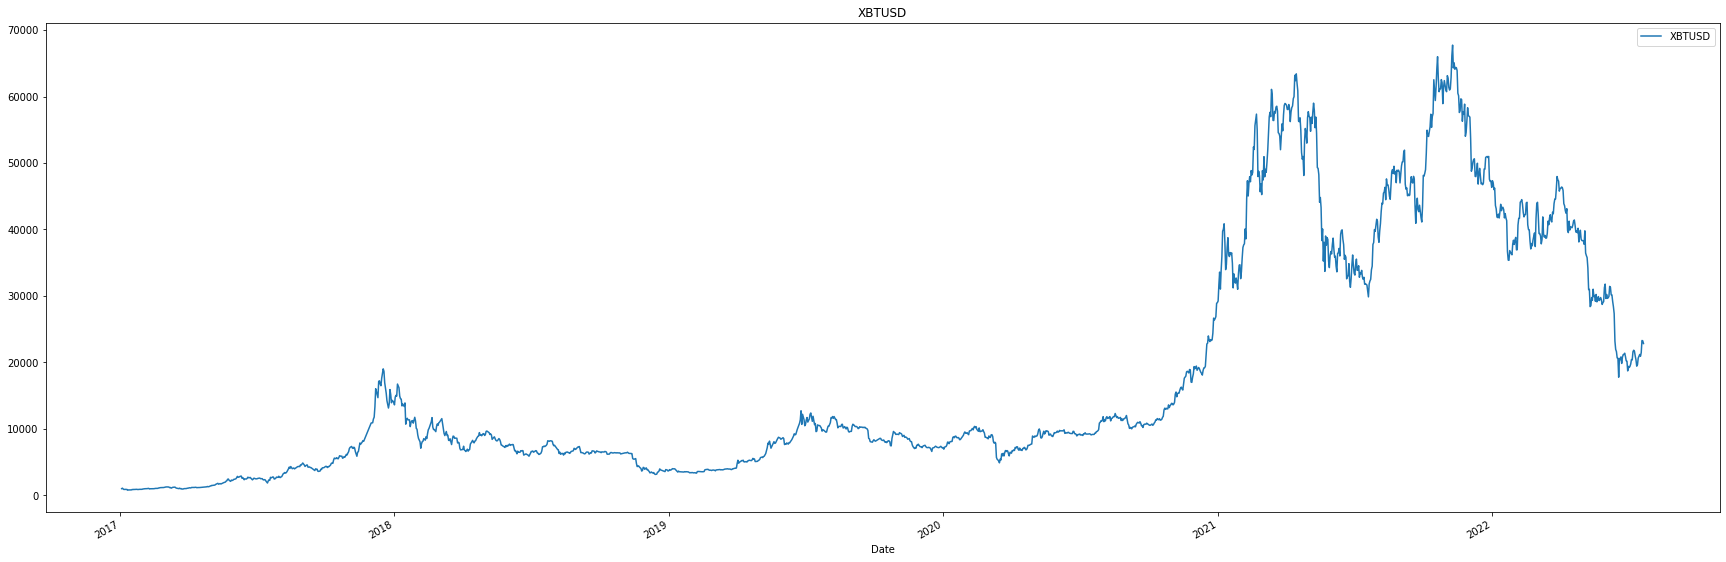

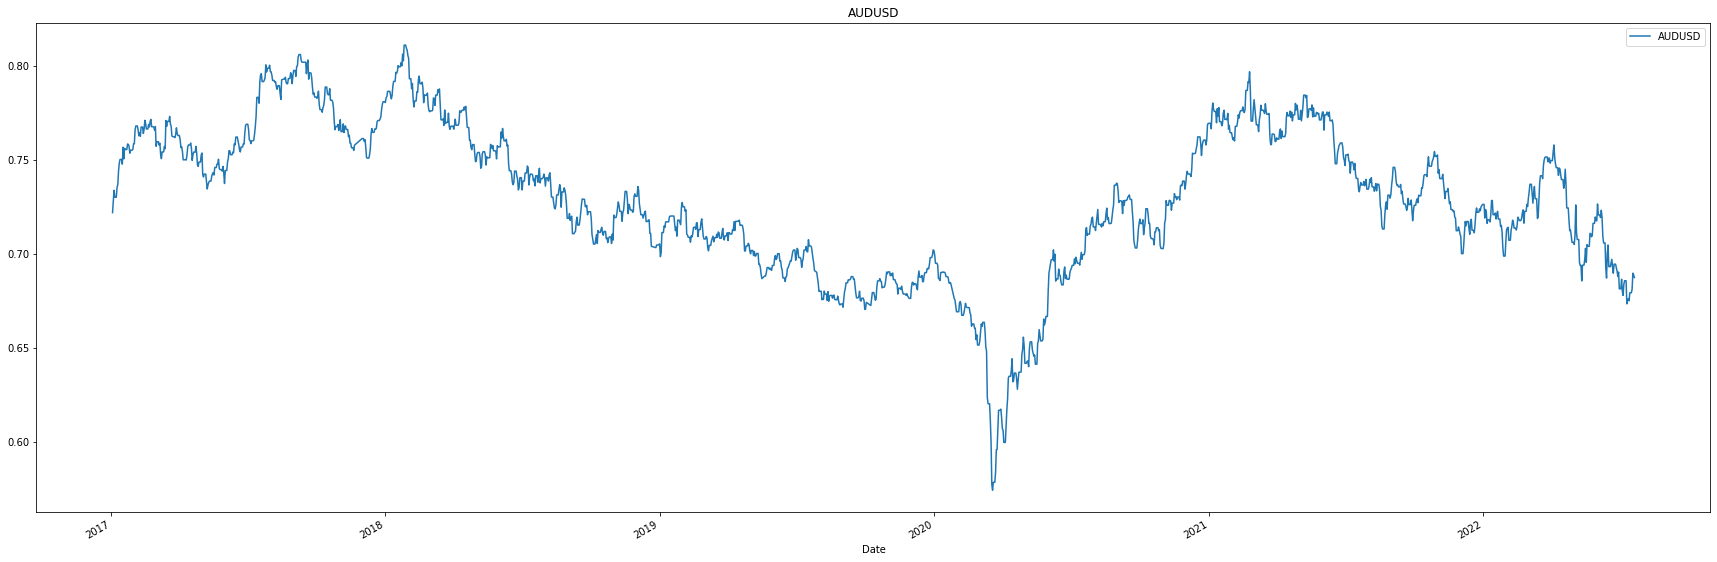

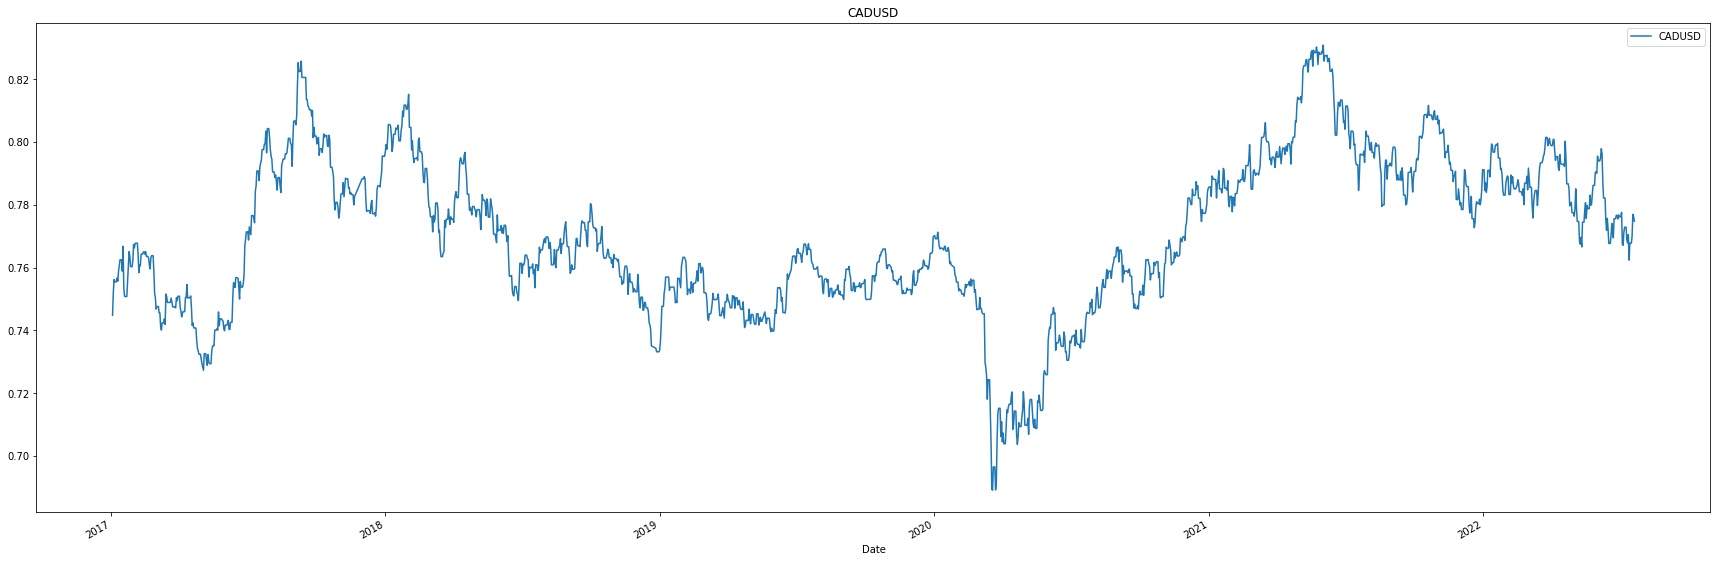

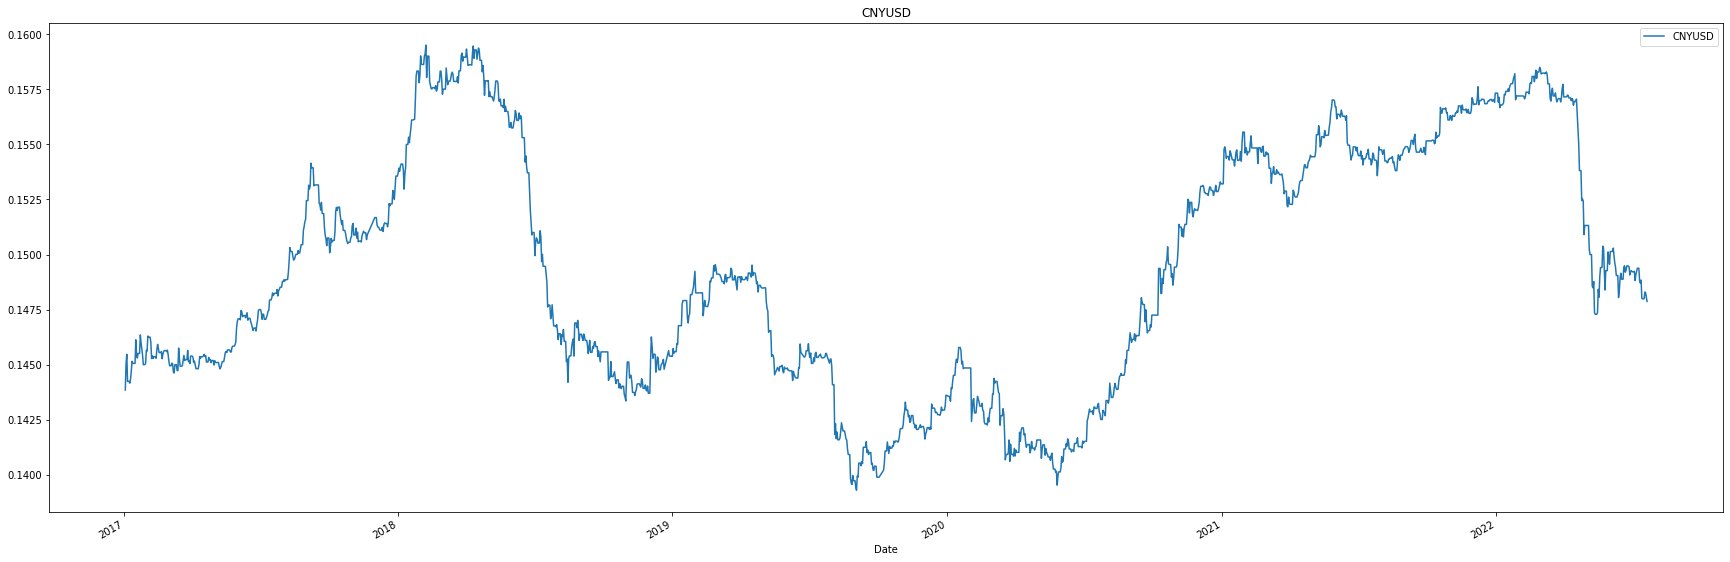

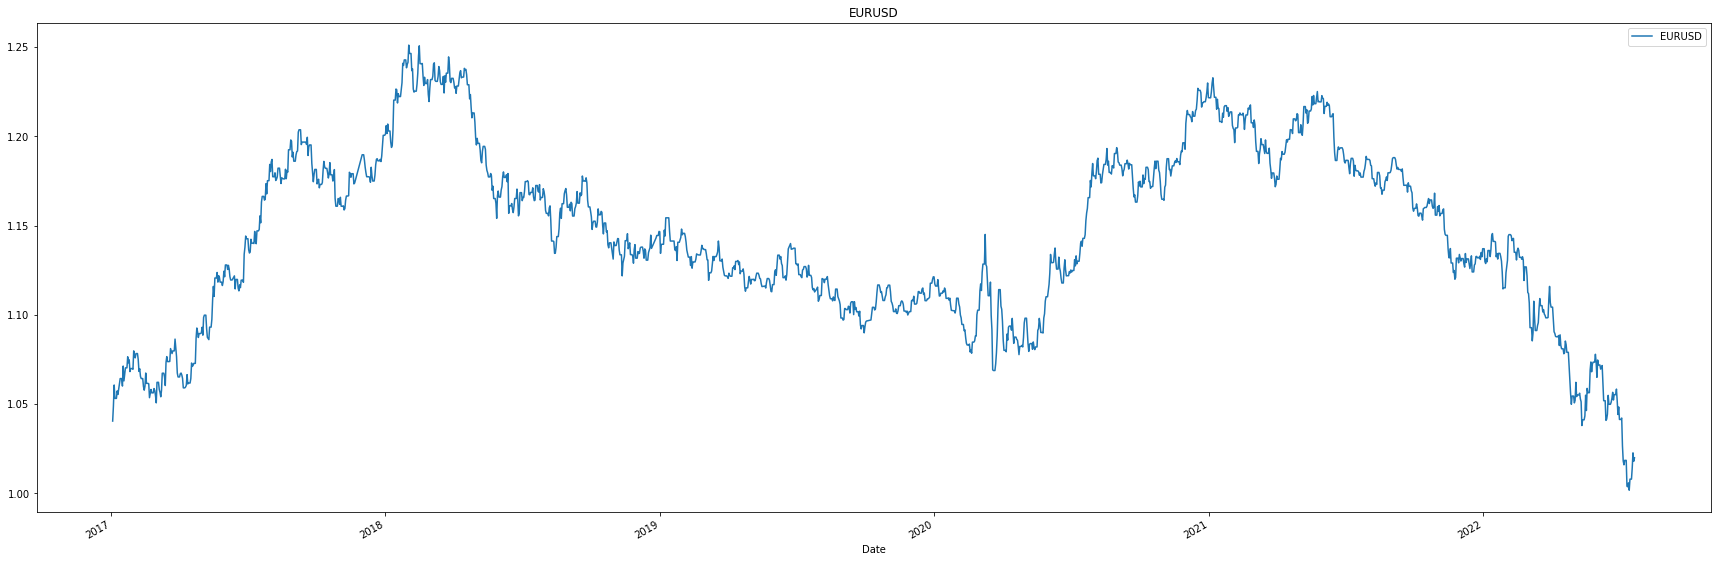

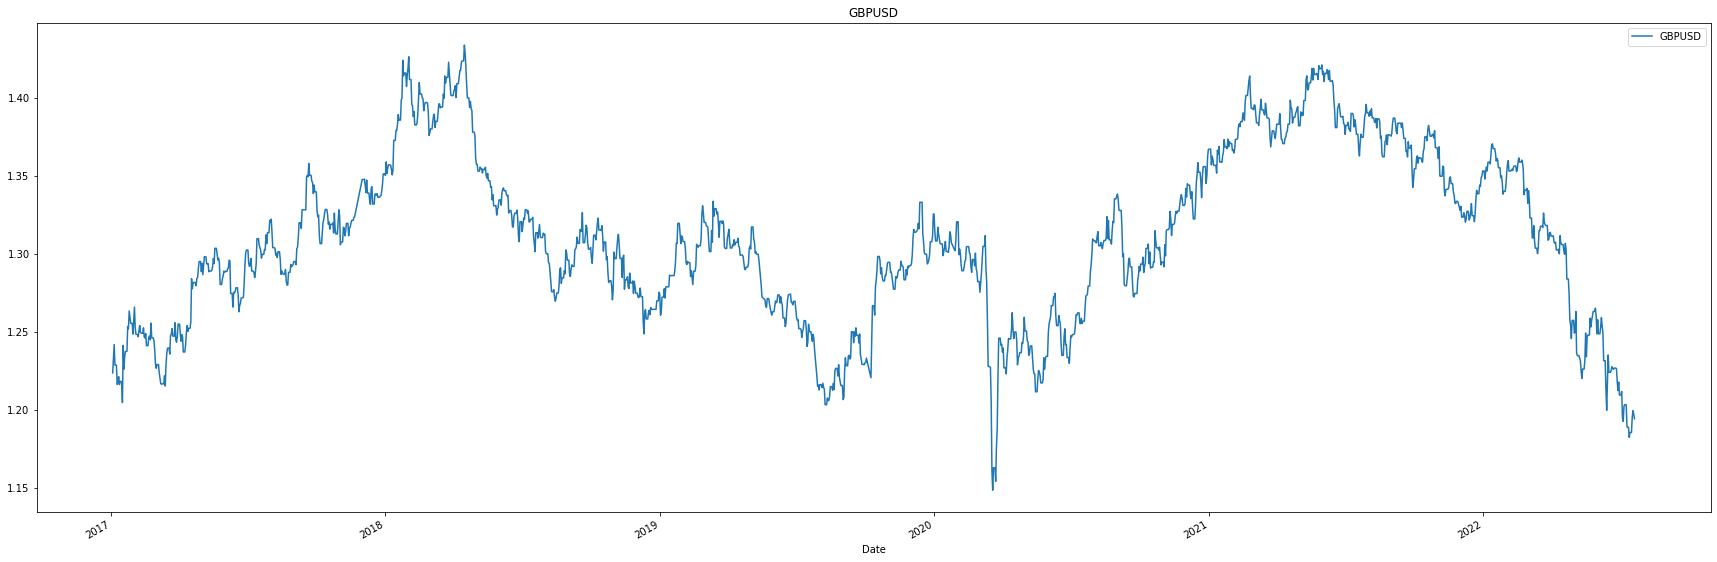

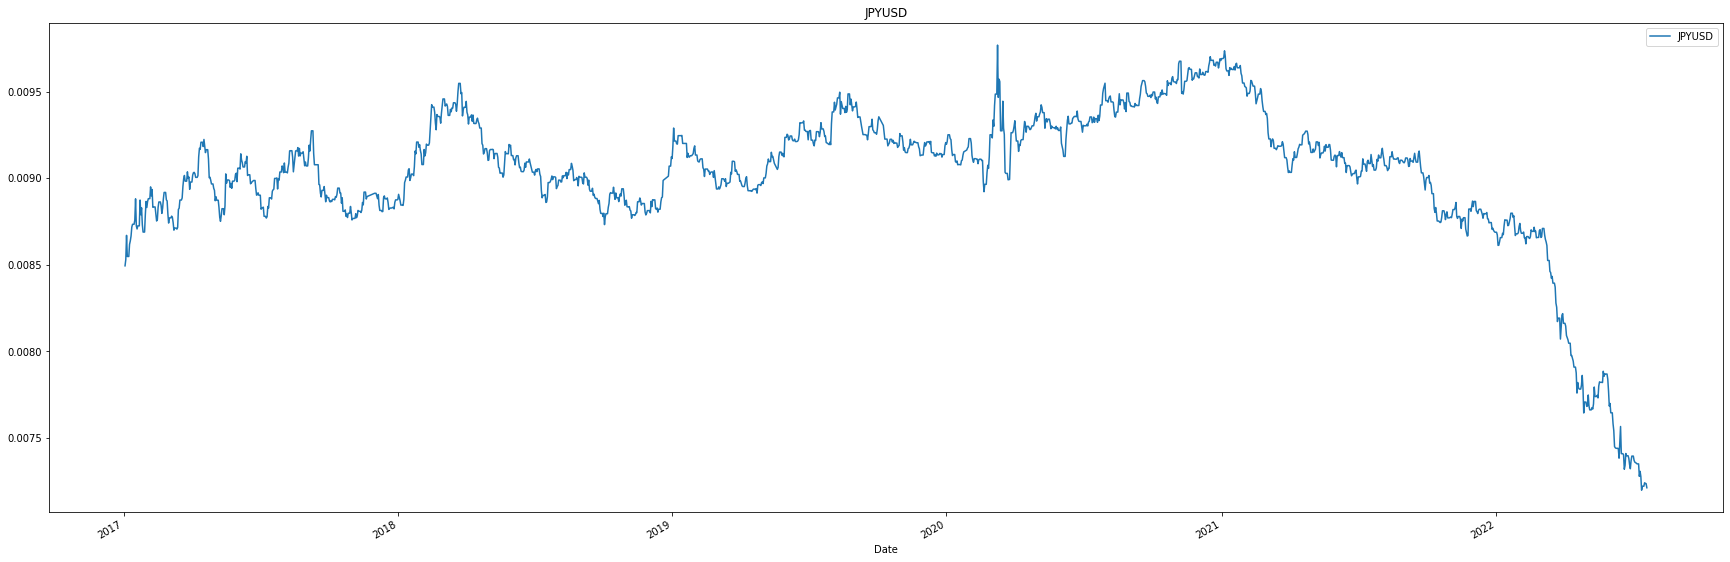

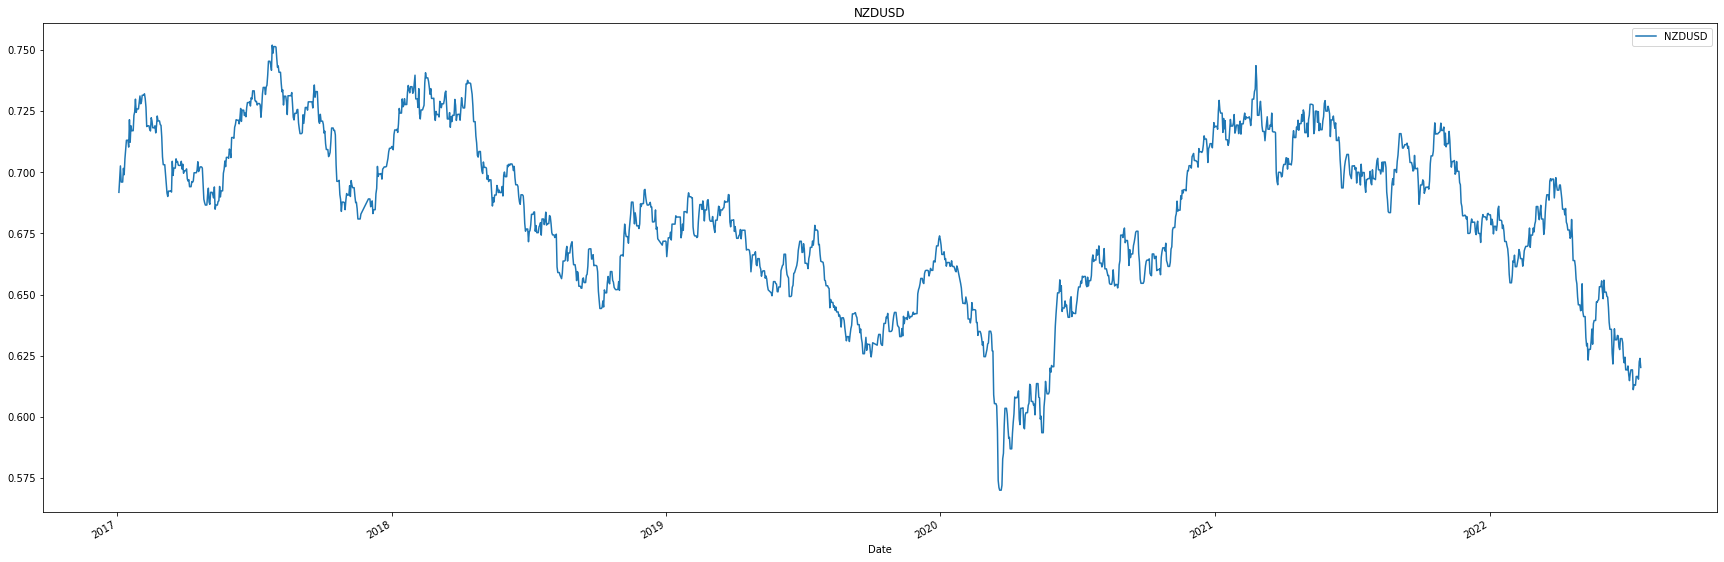

In [7]:
import matplotlib.pyplot as plt
column_list=price_usd_df.columns
colour =['red','blue','green','grey','yellow','pink','orange','black','brown']
for i in column_list[1:len(price_usd_df.columns)-1]:
  price_usd_df.plot(x='Date',y=i,subplots=True,figsize=(30,10))
  plt.title(i)
  plt.xlabel = 'Date'
  plt.ylabel = 'price in'+ i


df=price_usd_df



In [8]:
df=df.drop(['Date'],axis=1)
df.columns

Index(['XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD', 'SGDUSD'],
      dtype='object')

In [9]:
n_features=len(df.columns)
n_features

9

In [10]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [11]:
# split a   dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [12]:
# walk-forward validation for data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-n_features], test[i, -n_features]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = metrics.mean_absolute_error(test[:, -n_features], predictions)
	return error, test[:, -n_features], predictions

In [13]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
  # transform list into array
  train = np.asarray(train)
	# split into input and output columns
  trainX, trainy = train[:, :-n_features], train[:, -n_features]
	# fit model
  model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
  model.fit(trainX, trainy)
	# make a one-step prediction
  yhat = model.predict([testX])
  return yhat[0]

In [14]:
values = df.values

In [15]:
data = series_to_supervised(values, n_in=7)
split_point=int(0.2*len(data))
split_point
 

365

In [16]:
mae, y, yhat = walk_forward_validation(data,split_point)
print(mae)

1271.673326412671


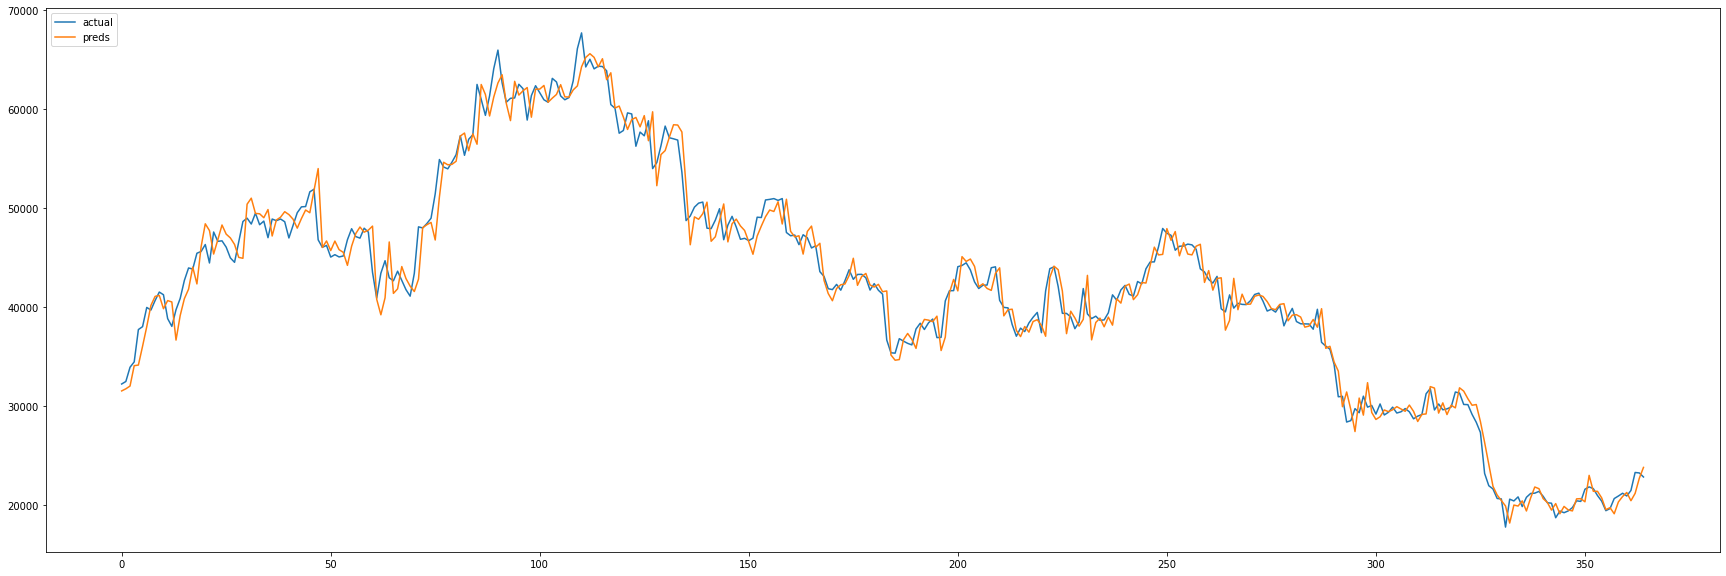

In [17]:
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(y,label='actual')
plt.plot(yhat,label='preds')
plt.legend(loc="upper left")
plt.show()

In [18]:
mape_base = mean_absolute_percentage_error(y,yhat)
mae_base,rmse_base,mse_base,r2_base=calculate_metrics(y,yhat)
print('Results of XG boost model before tuning')
print('MAPE  :{:0.4f}'.format(mape_base))
print('MAE  :{:0.4f}'.format(mae_base))
print('RMSE :{:0.4f} '.format(rmse_base))
print('MSE :{:0.4f} '.format(mse_base))
print('r2   :{:0.4f}'.format(r2_base))

mape---3.092036156744608
Results of XG boost model before tuning
MAPE  :3.0920
MAE  :1271.6733
RMSE :1723.8656 
MSE :2971712.6614 
r2   :0.9770


In [19]:
print('mean of test Y   :{:0.4f}'.format(y.mean()))
print('max of test Y   :{:0.4f}'.format(y.max()))
print('min of test Y   :{:0.4f}'.format(y.min()))

mean of test Y   :42244.1028
max of test Y   :67734.0400
min of test Y   :17785.0900


In [20]:
scaled_rmse_base=rmse_base/(y.max()-y.min())
print('scaled_rmse   :{:0.4f}'.format(scaled_rmse_base))

scaled_rmse   :0.0345


# ***Hyperparameter Tuning***

In [21]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [22]:
n_estimators = [100, 500, 900, 1100, 1500, 1600, 1700]
max_depth = [2, 3, 5, 10, 15, 20, 25]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20, 0.25, 0.30]
min_child_weight=[1,2,3,4,5,6]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [23]:
train1,test1=train_test_split(data, split_point)

In [24]:
regressor=xgboost.XGBRegressor()

In [25]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [26]:
train_X1,train_Y1=train1[:, :-n_features], train1[:, -n_features]

In [27]:
random_cv.fit(train_X1,train_Y1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[21:09:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 5, 10, 15, 20, 25],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500, 1600, 1700]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [28]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gblinear', learning_rate=0.3,
             max_depth=25, min_child_weight=6, n_estimators=1700)

In [29]:
def xgboost_forecast_tuned(train, testX):
  # transform list into array
  train = np.asarray(train)
	# split into input and output columns
  trainX, trainy = train[:, :-n_features], train[:, -n_features]
	# fit model
  #model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
  model=xgboost.XGBRegressor(objective='reg:squarederror',base_score=0.75, booster='gblinear', learning_rate=0.3,
             max_depth=25, min_child_weight=6, n_estimators=1700)
  model.fit(trainX, trainy)
	# make a one-step prediction
  yhat = model.predict([testX])
  return yhat[0]

In [30]:
def walk_forward_validation_tuned(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-n_features], test[i, -n_features]
		# fit model on history and make a prediction
		yhat = xgboost_forecast_tuned(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = metrics.mean_absolute_error(test[:, -n_features], predictions)
	return error, test[:, -n_features], predictions

In [31]:
mae, y1, yhat1 = walk_forward_validation_tuned(data,split_point)
print(mae)

1195.8652151113013


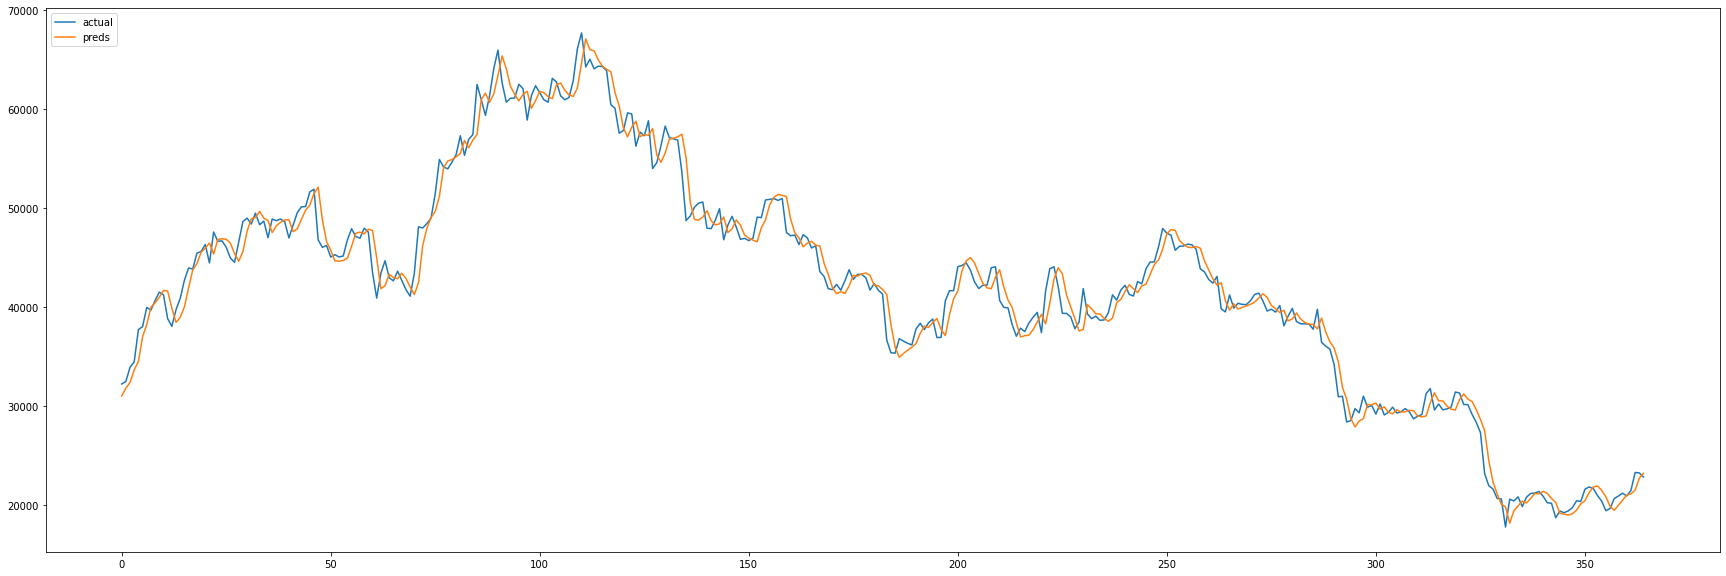

In [32]:
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(y1,label='actual')
plt.plot(yhat1,label='preds')
plt.legend(loc="upper left")
plt.show()

In [33]:
mape = mean_absolute_percentage_error(y1,yhat1)
mae,rmse,mse,r2=calculate_metrics(y1,yhat1)
print('Results of XG boost model after tuning')
print('MAPE  :{:0.4f}'.format(mape))
print('MAE  :{:0.4f}'.format(mae))
print('RMSE :{:0.4f} '.format(rmse))
print('MSE :{:0.4f} '.format(mse))
print('r2   :{:0.4f}'.format(r2))

mape---2.9527737480898573
Results of XG boost model after tuning
MAPE  :2.9528
MAE  :1195.8652
RMSE :1597.2083 
MSE :2551074.2051 
r2   :0.9803


In [34]:
print('mean of test Y   :{:0.4f}'.format(y1.mean()))
print('max of test Y   :{:0.4f}'.format(y1.max()))
print('min of test Y   :{:0.4f}'.format(y1.min()))

mean of test Y   :42244.1028
max of test Y   :67734.0400
min of test Y   :17785.0900


In [35]:
scaled_rmse=rmse/(y1.max()-y1.min())
print('scaled_rmse   :{:0.4f}'.format(scaled_rmse))

scaled_rmse   :0.0320
